In [1]:
import numpy as np    # for array, matrices operations Often used for numerical operations, data manipulation, and array operations.
import pandas as pd    #Pandas is a powerful data manipulation and analysis library. It provides data structures like DataFrames and Series to work with structured data.
import matplotlib.pyplot as plt #Creating a wide range of plots such as line plots, scatter plots, bar charts, histograms, etc.
import seaborn as sns #Creating more complex and aesthetically pleasing visualizations such as categorical plots, violin plots, pair plots, and heatmaps.
from sklearn.cluster import KMeans #Performing clustering analysis to segment customers into distinct groups based on their similarities.

### Data Collection and Analysis

In [3]:
# Loading the data from csv file to the pandas Dataframe
customer_data = pd.read_csv('Mall_Customers.csv')

In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#finding number of rows and columns
customer_data.shape


(200, 5)

In [7]:
#getting info of the customer_data table
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#checking the missong values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### we only need annual imcome and spending score column for the clustering

In [10]:
x = customer_data.iloc[:,[3,4]].values   # here we are extracting column 3, 4 from table using iloc (location) function and values to get values of it.

In [11]:
print(x)  # 15 is annual income in thousand dollars and 39 is spending score from 0-100

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Choosing the number of clusters

WCSS -> WITHIN CLUSTER SUM OF SQUARE

#### it is defined as the sum of square distances between the centroid and each point within cluster

In [13]:
# finding the WCSS value for different number of clusters

wcss = []

for i in range(1, 11):     # the i will iterate from 1 to 10 , 'KMeans' is clustering algorithm from scikit learn , k-means++ is initialize which intialize the cluster by choosing intial cluster center
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)   # random state will produce the same cluster each time genrate
    kmeans.fit(x)  # it will fit the values from x in kmeans
    wcss.append(kmeans.inertia_)   # it will append the each values in x in wcss into 10 clusters


C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

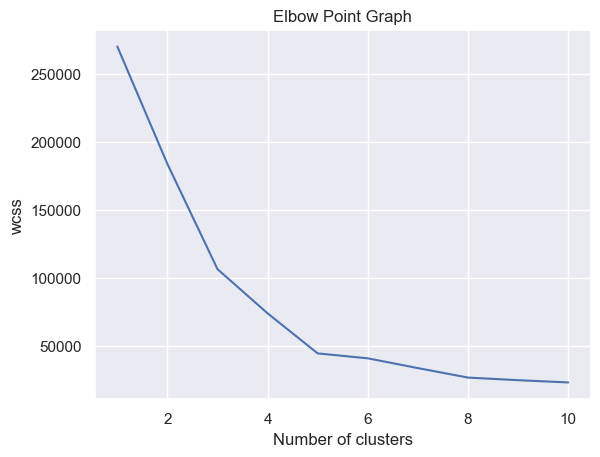

In [15]:
# plot the elbow graph

sns.set() # this will make the plot look good by providing parameter and theme
plt.plot(range(1,11), wcss)  # for x and y axis
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


### optimum number of clusters is = 5

### Training K-Means clustering model

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return label for each data point based on their cluster  (fit_predict) is the function used to label each data point a cluster

Y = kmeans.fit_predict(x)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


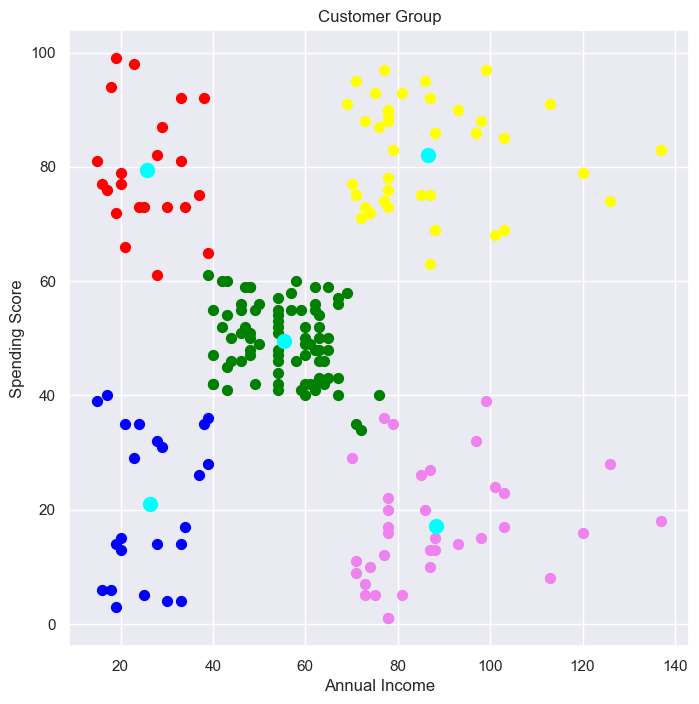

In [27]:
# plotting all the clusters and there centroids
# the figsize represent the 8 x 8 plot
# x[Y==0, 0] represent 0  => cluster and 0 => column 1 = annual income, and for another column 0 => cluster and 1 => spending score
# s => size of the dots

plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0], x[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[Y==1,0], x[Y==1,1], s=50, c='yellow', label='Cluster 2')  
plt.scatter(x[Y==2,0], x[Y==2,1], s=50, c='violet', label='Cluster 3')  
plt.scatter(x[Y==3,0], x[Y==3,1], s=50, c='blue', label='Cluster 4')  
plt.scatter(x[Y==4,0], x[Y==4,1], s=50, c='red', label='Cluster 5')  


# plot the centroids 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()